# Linear Regression 1D: Training One Parameter

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
class plot_diagram():
    def __init__(self,X,Y,w,stop,go=False):
        start=w.data
        self.error=[]
        self.parameter=[]
        print(type(X.numpy()))
        self.X=X.numpy()
        self.Y=Y.numpy()
        self.parameter_values=torch.arange(start,stop)
        self.Loss_function=[criterion(forward(X),Y) for w.data in self.parameter_values]
        w.data=start
    def __call__(self,Yhat,w,error,n):
        self.error.append(w.data)
        plt.subplot(212)
        plt.plot(self.X,Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel('A')
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        #convert lists to pytorch tensors
        parameter_values_tensor=torch.tensor(self.parameter_values)
        loss_function_tensor=torch.tensor(self.Loss_function)

        #Plot using the tensors 
        plt.plot(parameter_values_tensor.numpy(), loss_function_tensor.numpy())
        plt.plot(self.parameter,self.error,'ro')
        plt.xlabel('B')
        plt.figure()

    def __del__(self):
        plt.close('all')


In [10]:
# Make some Data

In [12]:
import torch

In [24]:
X=torch.arange(-3,3,0.1).view(-1,1)
f=-3*X

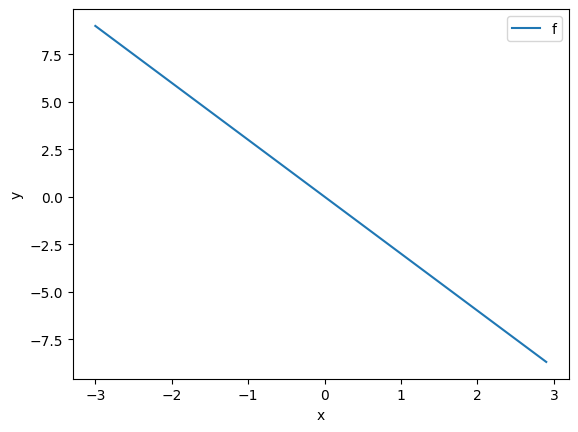

In [30]:
plt.plot(X.numpy(),f.numpy(),label='f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [36]:
Y=f+-0.1*torch.randn(X.size())

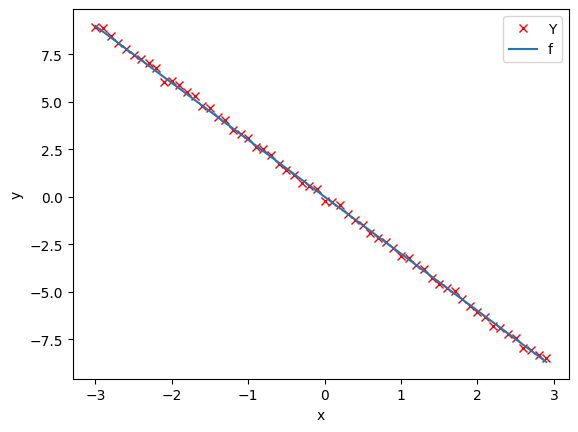

In [42]:
plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Create the model and cost function (total loss)

In [48]:
def forward(x):
    return w*x

In [50]:
def criterion(yhat,y):
    return torch.mean((yhat-y)**2)

In [52]:
lr=0.1
LOSS=[]

In [54]:
w = torch.tensor(-10.0, requires_grad = True)

In [56]:
gradient_plot=plot_diagram(X,Y,w,stop=5)

<class 'numpy.ndarray'>


In [58]:
# train the model
def train_model(iter):
    for epoch in range(iter):
        yhat=forward(x)
        loss=criterion(yhat,Y)
        gradient_plot(yhat,w,loss.item(),epoch)
        LOSS.append(loss.item())
        loss.backward()
        w.data=w.data-lr * w.grad.data
        w.grad.data.zero_()

C:\Users\26amr\AppData\Local\Temp\ipykernel_35184\4174496055.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  parameter_values_tensor=torch.tensor(self.parameter_values)


ValueError: x and y must have same first dimension, but have shapes (0,) and (1,)

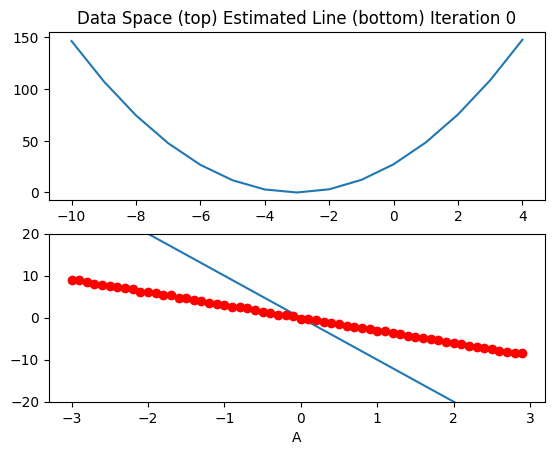

In [60]:
train_model(4)

[]


Text(22.472222222222214, 0.5, 'Cost')

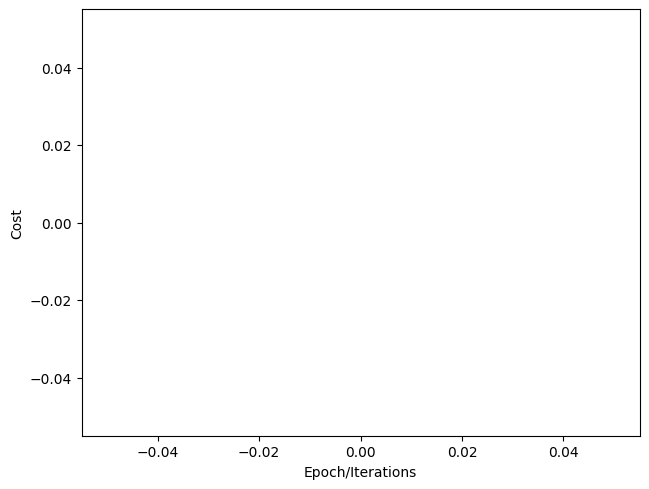

In [64]:
print(LOSS)
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

In [66]:
w = torch.tensor(-15.0, requires_grad=True)